<a href="https://colab.research.google.com/github/manjunathsirur1994/Decision_Trees/blob/main/Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision Tree for Classification
-------------------------

Documentation: https://archive.ics.uci.edu/dataset/45/heart+disease

-----------

Lets import UCI machine learning repo library to import data directly.



In [ ]:
!pip install ucimlrepo

The below code will be provided at UCI ML Repo to download this data

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
heart_disease = fetch_ucirepo(id=45)

# data (as pandas dataframes)
features = heart_disease.data.features
target = heart_disease.data.targets

# metadata
print(heart_disease.metadata)

# variable information
print(heart_disease.variables)


{'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'ID': 231, 'type': 'NATIVE', 'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.', 'authors': 'R. Detrano, A. Jánosi, W. Steinbrunn, M

In [ ]:
# Lets import all required libs

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
# lets create a dataframe out of x and y

df = pd.DataFrame(features, columns=features.columns)
df['hd'] = target
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,2
300,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
301,57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1


In [ ]:
# lets see what data types we've got

df.dtypes

,0
age,int64
sex,int64
cp,int64
trestbps,int64
chol,int64
fbs,int64
restecg,int64
thalach,int64
exang,int64
oldpeak,float64


Lets check out all value counts of all the variables excluding continous and long list of numerical variables.

In [ ]:
df['ca'].value_counts()

,count
ca,
0.0,176
1.0,65
2.0,38
3.0,20


In [ ]:
df['slope'].value_counts()

,count
slope,
1,142
2,140
3,21


In [ ]:
df['exang'].value_counts()

,count
exang,
0,204
1,99


In [ ]:
df['restecg'].value_counts()

,count
restecg,
0,151
2,148
1,4


In [ ]:
df['fbs'].value_counts()

,count
fbs,
0,258
1,45


In [ ]:
df['sex'].value_counts()

,count
sex,
1,206
0,97


In [ ]:
df['cp'].value_counts()

,count
cp,
4,144
3,86
2,50
1,23


In [ ]:
df['ca'].value_counts()

,count
ca,
0.0,176
1.0,65
2.0,38
3.0,20


In [ ]:
df['thal'].value_counts()

,count
thal,
3.0,166
7.0,117
6.0,18


In [ ]:
df.isna().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [ ]:
df[df.isna().any(axis=1)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
87,53,0,3,128,216,0,2,115,0,0.0,1,0.0,NaN,0
166,52,1,3,138,223,0,0,169,0,0.0,1,NaN,3.0,0
192,43,1,4,132,247,1,2,143,1,0.1,2,NaN,7.0,1
266,52,1,4,128,204,1,0,156,1,1.0,2,0.0,NaN,2
287,58,1,2,125,220,0,0,144,0,0.4,2,NaN,7.0,0
302,38,1,3,138,175,0,0,173,0,0.0,1,NaN,3.0,0


In [ ]:
# Lets remove the missing values since there is negligible number of missing values.

df = df.dropna()

In [ ]:
# ADD more analysis here

If you look at the documentation of this data in UCIML repo, you will see cp is actually a categorical data. So we need to change this to one hot encoding.

1. typical angina
2. atypical angina
3. non anginal pain
4. asymptomatic

In [ ]:
dummies = pd.get_dummies(df, columns=['cp','restecg','slope','thal'],drop_first=True)
dummies

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,hd,cp_2,cp_3,cp_4,restecg_1,restecg_2,slope_2,slope_3,thal_6.0,thal_7.0
0,63,1,145,233,1,150,0,2.3,0.0,0,False,False,False,False,True,False,True,True,False
1,67,1,160,286,0,108,1,1.5,3.0,2,False,False,True,False,True,True,False,False,False
2,67,1,120,229,0,129,1,2.6,2.0,1,False,False,True,False,True,True,False,False,True
3,37,1,130,250,0,187,0,3.5,0.0,0,False,True,False,False,False,False,True,False,False
4,41,0,130,204,0,172,0,1.4,0.0,0,True,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57,0,140,241,0,123,1,0.2,0.0,1,False,False,True,False,False,True,False,False,True
298,45,1,110,264,0,132,0,1.2,0.0,1,False,False,False,False,False,True,False,False,True
299,68,1,144,193,1,141,0,3.4,2.0,2,False,False,True,False,False,True,False,False,True
300,57,1,130,131,0,115,1,1.2,1.0,3,False,False,True,False,False,True,False,False,True


In [ ]:
df = dummies.copy()
df = df.replace({True:1, False:0})
df.head()

<ipython-input-89-fc8b64bef1af>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({True:1, False:0})


,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,hd,cp_2,cp_3,cp_4,restecg_1,restecg_2,slope_2,slope_3,thal_6.0,thal_7.0
0,63,1,145,233,1,150,0,2.3,0.0,0,0,0,0,0,1,0,1,1,0
1,67,1,160,286,0,108,1,1.5,3.0,2,0,0,1,0,1,1,0,0,0
2,67,1,120,229,0,129,1,2.6,2.0,1,0,0,1,0,1,1,0,0,1
3,37,1,130,250,0,187,0,3.5,0.0,0,0,1,0,0,0,0,1,0,0
4,41,0,130,204,0,172,0,1.4,0.0,0,1,0,0,0,1,0,0,0,0


In [ ]:
df.dtypes

,0
age,int64
sex,int64
trestbps,int64
chol,int64
fbs,int64
thalach,int64
exang,int64
oldpeak,float64
ca,float64
hd,int64


In [ ]:
x = df.drop(columns=['hd'])
y = df['hd']
print(x.shape)
print(y.shape)

(297, 18)
(297,)


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(237, 18)
(237,)
(60, 18)
(60,)


In [ ]:
clf_dt = DecisionTreeClassifier()
clf_dt.fit(x_train,y_train)

DecisionTreeClassifier()

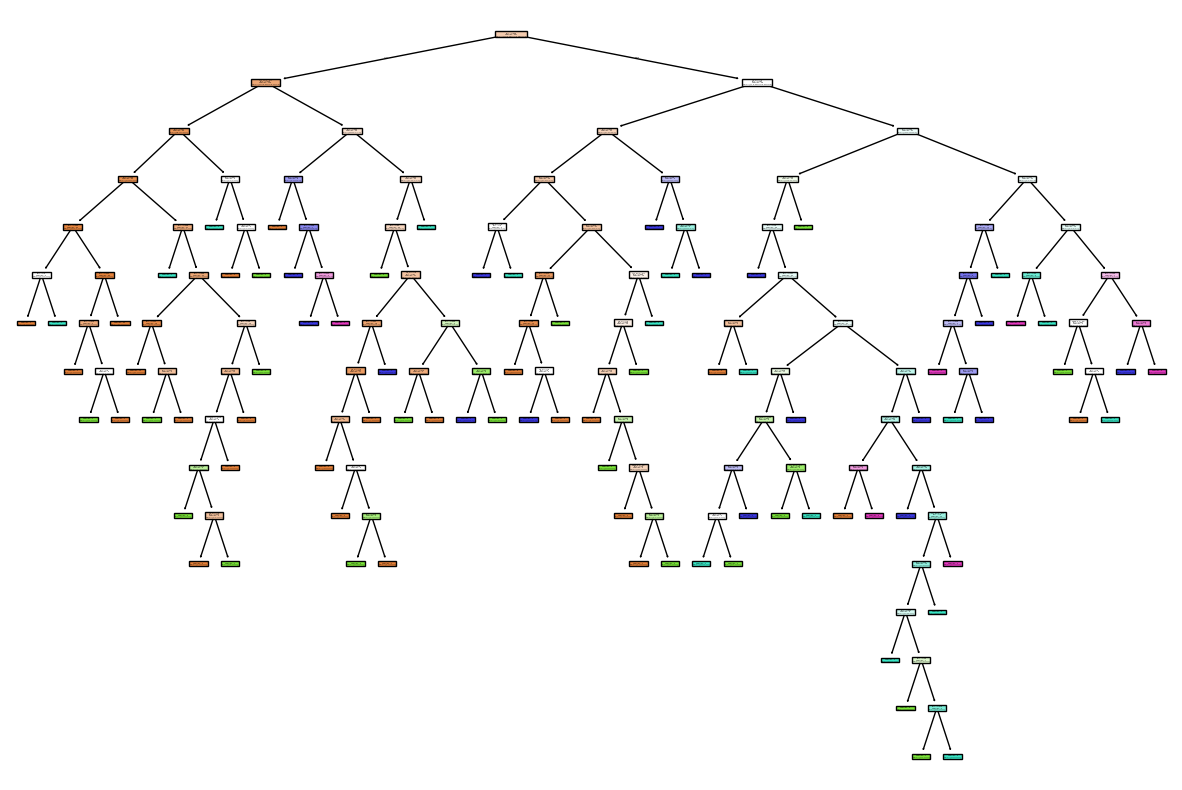

In [ ]:
plt.figure(figsize=(15,10))
plot_tree(clf_dt, filled=True, feature_names=x.columns)
plt.show()

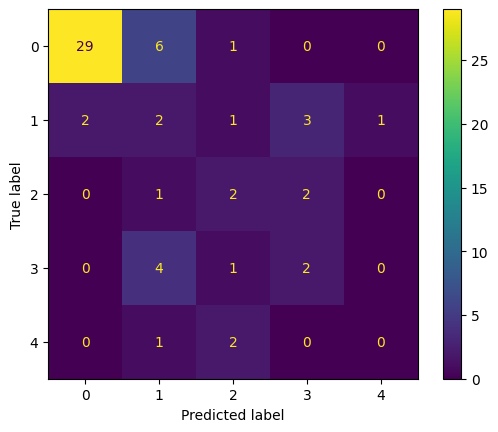

In [ ]:
ConfusionMatrixDisplay(confusion_matrix(y_test, clf_dt.predict(x_test))).plot()

In [ ]:
df['hd'].value_counts()

,count
hd,
0,160
1,54
2,35
3,35
4,13
